In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/spam[1].csv', encoding='latin1')


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data Cleaning
# 2. EDA

In [8]:
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements

In [9]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Most of the values are missing in these three un named columns So we have to drop these last three ciolumns

In [12]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
# inplace=True means modify the original DataFrame directly, without creating a new copy.

 # If you set inplace=False (or leave it out), df.drop() returns a new DataFrame with the columns removed, but doesn't change the original df.

In [14]:
df.sample(5)

,v1,v2
2108,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...
3775,ham,Ok lor. Msg me b4 u call.
5035,spam,You won't believe it but it's true. It's Incre...
1325,ham,Yeah jay's sort of a fucking retard
5134,ham,Sday only joined.so training we started today:)


In [15]:
# Renaming the column names

In [16]:
df.rename(columns={'v1' : 'target','v2' : 'text'},inplace=True)


In [17]:
df.shape

(5572, 2)

In [18]:
df.sample(5)

,target,text
1989,ham,The basket's gettin full so I might be by tonight
2630,ham,No way I'm going back there!
4603,ham,THANX 4 PUTTIN DA FONE DOWN ON ME!!
630,ham,Please dont say like that. Hi hi hi
3298,ham,Honeybee Said: *I'm d Sweetest in d World* God...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [20]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
df.sample(5)

,target,text
5204,ham,How come she can get it? Should b quite diff t...
4126,ham,"Sorry, I'll call later"
3203,ham,She's good. How are you. Where r u working now
3024,ham,"What part of \don't initiate\"" don't you under..."
4354,ham,"Sorry, I can't help you on this."


In [22]:
df['target']=encoder.fit_transform(df['target'])

In [23]:
df.sample(10)

,target,text
3803,0,"No dude, its not fake..my frnds got money, tht..."
1310,0,"I.ll always be there, even if its just in spir..."
55,0,Do you know what Mallika Sherawat did yesterda...
4026,0,"Yes, princess. Are you going to make me moan?"
4733,1,Buy Space Invaders 4 a chance 2 win orig Arcad...
4380,0,Mathews or tait or edwards or anderson
3109,1,Good Luck! Draw takes place 28th Feb 06. Good ...
2105,0,I fetch yun or u fetch?
3238,0,Am okay. Will soon be over. All the best
4944,0,Anyway I don't think I can secure anything up ...


In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
#Find missing values
df.isnull().sum()

,0
target,0
text,0


In [26]:
(df['target'] == 0).sum()
# Number of zeroes or ham in the data set


np.int64(4825)

In [27]:
df.duplicated().sum()

np.int64(403)

In [28]:
# so we have to drop these 403 duplicated values

In [29]:
df=df.drop_duplicates(keep='first')

In [30]:
df.shape

(5169, 2)

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
# so we have succesfully removed alll the duplicated values

## 2. EDA

In [34]:
# Check how many percantage is spam and ham

In [35]:
df['target'].value_counts()

,count
target,
0,4516
1,653


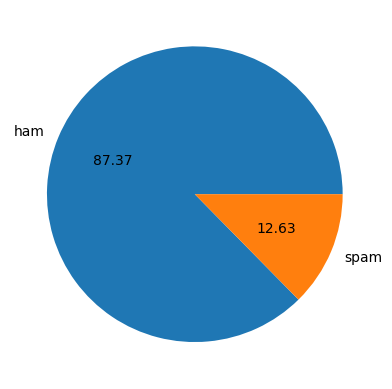

In [36]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [37]:
# so ham is much much more than spam in the data so the data is imbalanced

In [38]:
!pip install nltk
import nltk # natural language tool kit
!pip install nltk

In [39]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [40]:
df = df.copy()  # make sure it's a fresh copy, not a view
df['num_characters'] = df['text'].apply(len)


In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# num of words


df = df.copy()
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
# for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
#for spam

In [49]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [50]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

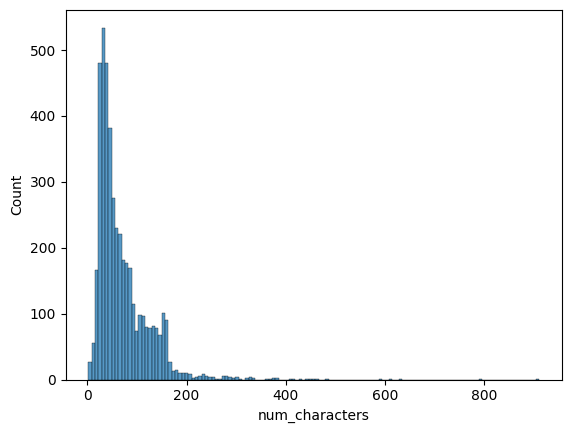

In [51]:
sns.histplot(df[df['target']==0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

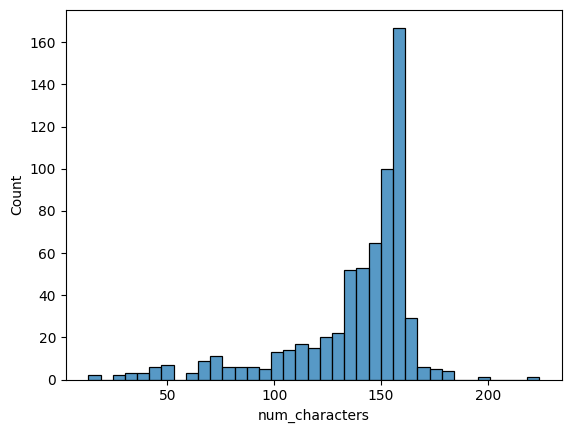

In [52]:
sns.histplot(df[df['target']==1]['num_characters']) # for spam

In [53]:
# so number of characters in spam are less than ham messages
# lets form a differencing histogram

<Axes: xlabel='num_characters', ylabel='Count'>

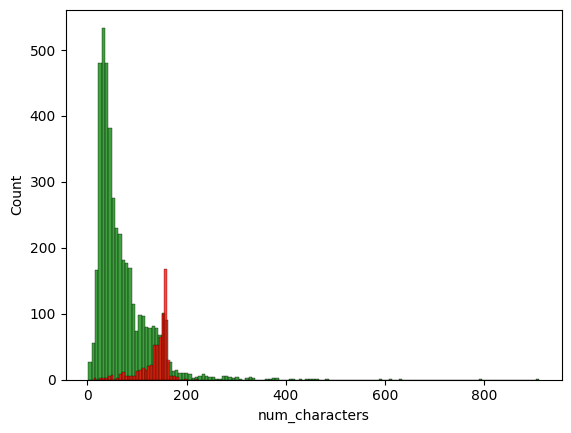

In [54]:
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

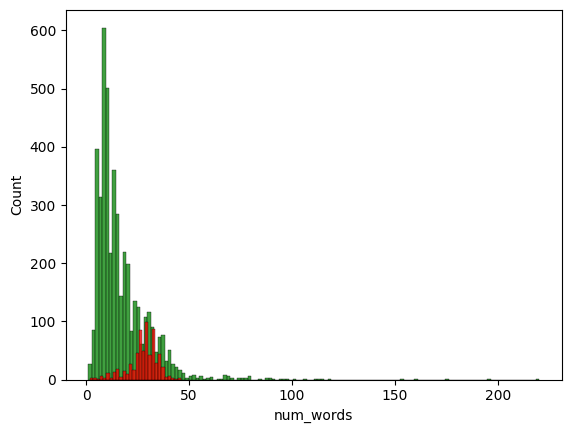

In [55]:
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

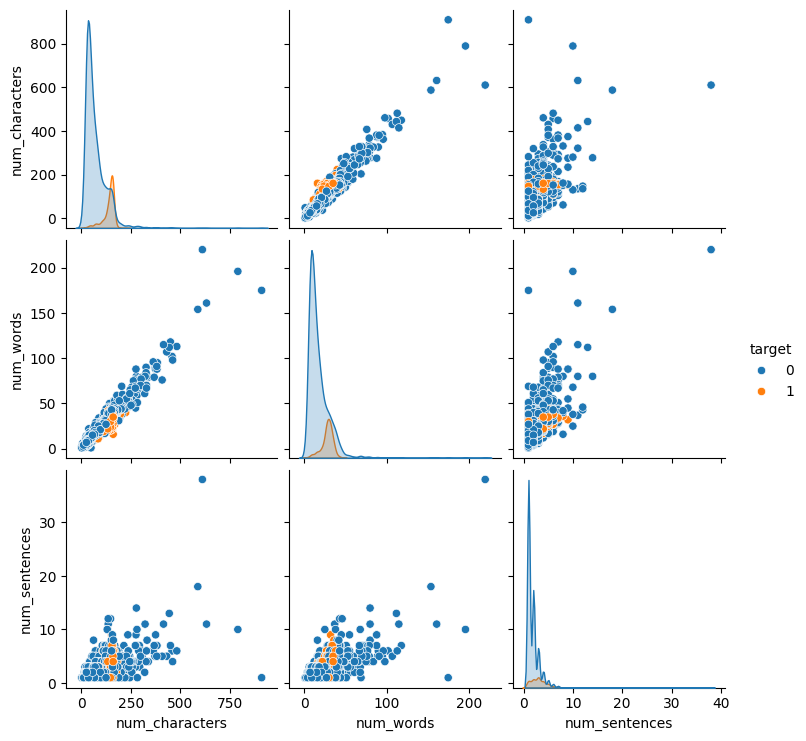

In [56]:
sns.pairplot(df,hue='target')

In [57]:
df.corr(numeric_only=True) #Corelation coffectient or Pearson coffecient

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

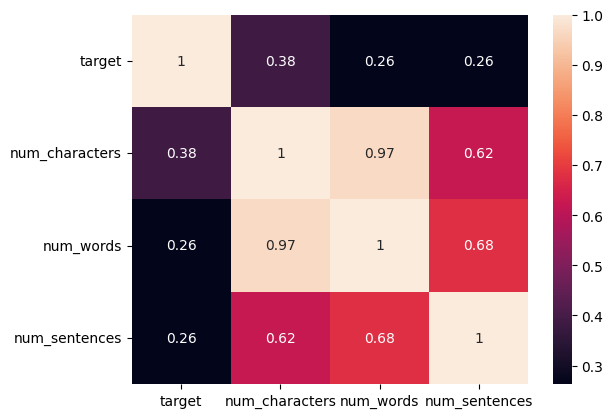

In [58]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing
#Lower case
#Tokenization
#Removing speciall characters
#Removing stop words and punctuation
#stemming

In [59]:
def transform_text(text):
    text=text.lower()
    return text

In [60]:
transform_text("How  ARE YOU")

'how  are you'

In [61]:
# NOW TOKENISE TEXT AS WELL

In [62]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text

In [63]:
transform("How  ARE YOU")

['how', 'are', 'you']

In [64]:
# Removing special Characters

In [65]:
def transforming(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in  text:
        if i.isalnum():
            y.append(i)
    return y

In [66]:
transforming("Ki ---- Haaal Chaal ++")

['ki', 'haaal', 'chaal']

In [67]:
# Now removing stop words and punctuation

In [68]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Now you can access the stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [69]:
stop_words = stopwords.words('english')

In [70]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [71]:
# Now we havve to remove the stopwords

In [72]:
# now we also have to remove the punctuation marks

In [73]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
## Again forming a function which will do all this

In [75]:
def transforming_sentences(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in  text:
        if i.isalnum():
            y.append(i)
    text=y[ : ]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [76]:
transforming_sentences('Hello wadhwa saab ki haal chaal')

['hello', 'wadhwa', 'saab', 'ki', 'haal', 'chaal']

In [77]:
transforming_sentences('Hi how are you umesh')

['hi', 'umesh']

In [78]:
# so in above line how are you are stop words


In [79]:
# stemming

In [80]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [81]:
ps.stem('Dancing')

'danc'

In [82]:
def pre_processing(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in  text:
        if i.isalnum():
            y.append(i)
    text=y[ : ]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[ : ]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [83]:
pre_processing('I running -- the cycle on  hi what are you doing')

'run cycl hi'

In [84]:
df['text'].apply(pre_processing)

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [85]:
df['transformed_text']=df['text'].apply(pre_processing)

In [86]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='White')

In [87]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

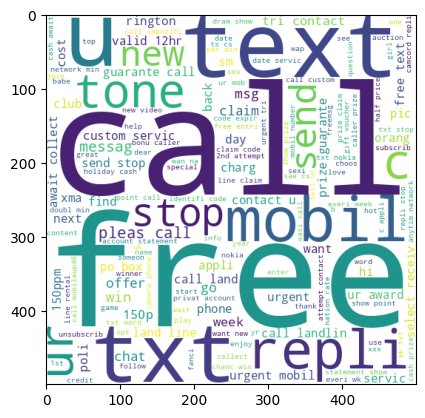

In [88]:
plt.imshow(spam_wc)

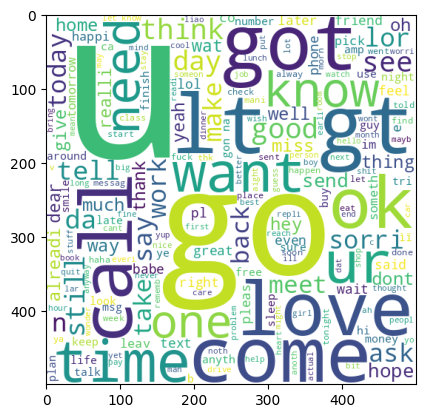

In [89]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [90]:
spam_folder=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_folder.append(word)

In [91]:
len(spam_folder)

9939

In [92]:
from collections import Counter

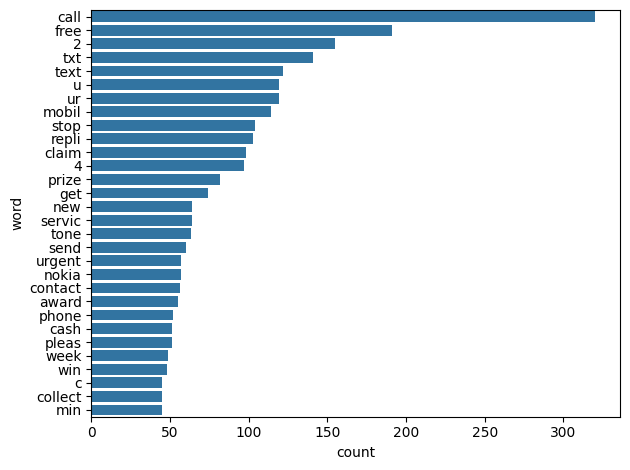

In [93]:
import seaborn as sns
import pandas as pd
from collections import Counter

# Create DataFrame from Counter
top_spam_words = pd.DataFrame(Counter(spam_folder).most_common(30), columns=['word', 'count'])

# Plot using named arguments
sns.barplot(x='count', y='word', data=top_spam_words)
import matplotlib.pyplot as plt

plt.tight_layout()
plt.show()



In [94]:
ham_folder=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_folder.append(word)

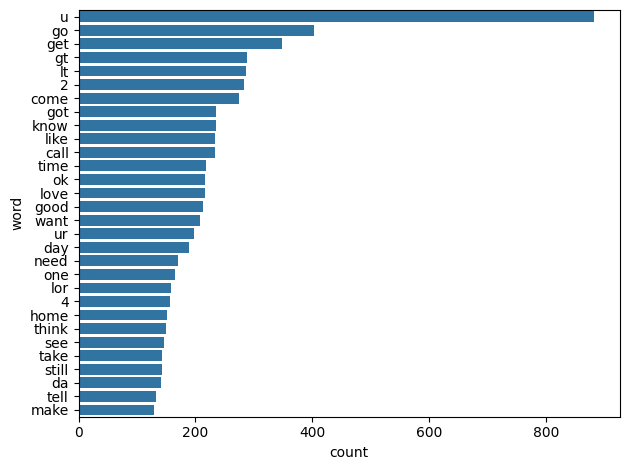

In [95]:
import seaborn as sns
import pandas as pd
from collections import Counter

# Create DataFrame from Counter
top_ham_words = pd.DataFrame(Counter(ham_folder).most_common(30), columns=['word', 'count'])

# Plot using named arguments
sns.barplot(x='count', y='word', data=top_ham_words)
import matplotlib.pyplot as plt

plt.tight_layout()
plt.show()

#Model Building

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()  # ← instantiate the vectorizer
Z = CV.fit_transform(df['transformed_text']).toarray()

In [97]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
Z.shape

(5169, 6708)

In [99]:
y =df['target'].values

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(Z,y,test_size=0.2,random_state=2)

In [102]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [103]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [104]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)

In [105]:
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [106]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)

In [107]:
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [108]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)

In [109]:
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [110]:
# now form it by tfidfvector

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()  # ← instantiate the vectorizer
newX = tfidf.fit_transform(df['transformed_text']).toarray()

In [112]:
newX.shape

(5169, 6708)

In [113]:
y =df['target'].values

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(newX,y,test_size=0.2,random_state=2)

In [116]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [117]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [118]:
gnb.fit(X_train,Y_train)
y_pred4 = gnb.predict(X_test)

In [119]:
print(accuracy_score(Y_test,y_pred4))
print(confusion_matrix(Y_test,y_pred4))
print(precision_score(Y_test,y_pred4))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [120]:
mnb.fit(X_train,Y_train)
y_pred5 = mnb.predict(X_test)

In [121]:
print(accuracy_score(Y_test,y_pred5))
print(confusion_matrix(Y_test,y_pred5))
print(precision_score(Y_test,y_pred5))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [122]:
bnb.fit(X_train,Y_train)
y_pred6 = bnb.predict(X_test)

In [123]:
print(accuracy_score(Y_test,y_pred6))
print(confusion_matrix(Y_test,y_pred6))
print(precision_score(Y_test,y_pred6))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [124]:
# we choose tfidf and mnb
!pip install xgboost

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [126]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [127]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [128]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [129]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9729206963249516, 0.9741379310344828)

In [130]:
accuracy_scores = []
precision_scores =[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [131]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [132]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.937137,0.854369


In [133]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [134]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.937137


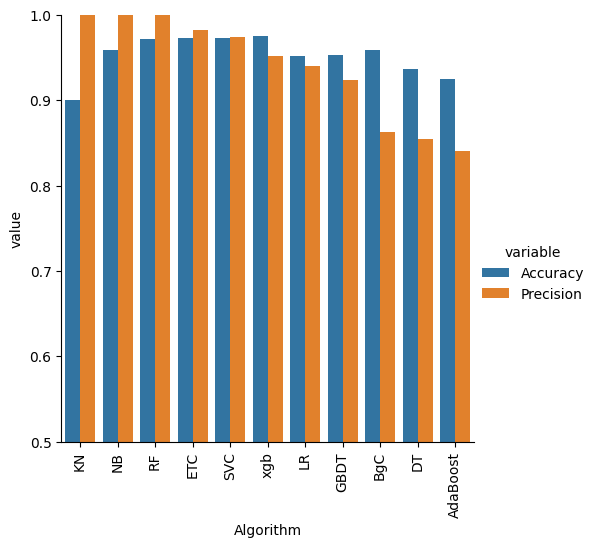

In [135]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#Model Improvement

In [136]:
from sklearn.svm import SVC

svc = SVC(probability=True)

vc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [137]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [138]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [139]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9796905222437138
Precision 1.0


In [140]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [141]:
from sklearn.ensemble import StackingClassifier

In [142]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [144]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9796905222437138
Precision 1.0


In [145]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))